#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Загрузка и подключение библиотек

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [75]:
try:
    data=pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
except FileNotFoundError:
    data=pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [77]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<b>Промежуточный вывод:</b>
- Были загружены и импортированны библиотеки
- Были загруженны данные 
- Пропуски в данных отсутствуют
- datetime: Дата и время заказа такси (тип данных: datetime64[ns])
- num_orders: Количество заказов такси (целевой признак, тип данных: int64)

## Анализ

Вывод факторного анализа

In [80]:
data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Минимальное количество заказов за час составляет 0, а максимальное — 119.

Построим график вызовов по часам

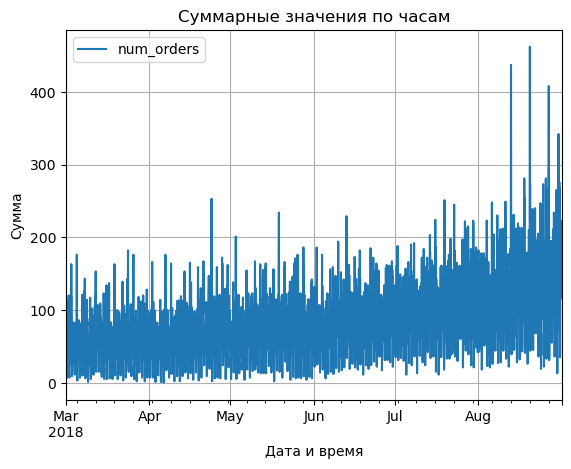

In [89]:
data=data.resample('1h').sum()
data.plot(title='Суммарные значения по часам', xlabel='Дата и время', ylabel='Сумма')
plt.grid(True);

Построим график вызовов по дням

<Figure size 1500x1000 with 0 Axes>

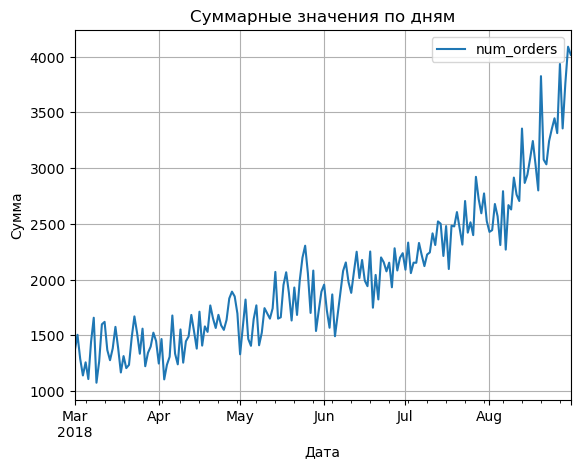

In [82]:
plt.figure(figsize=(15,10))
data.resample('1D').sum().plot(title='Суммарные значения по дням', xlabel='Дата', ylabel='Сумма')
plt.grid(True);

Построим график скользяцего (500 наблюдений)

<Figure size 1500x1000 with 0 Axes>

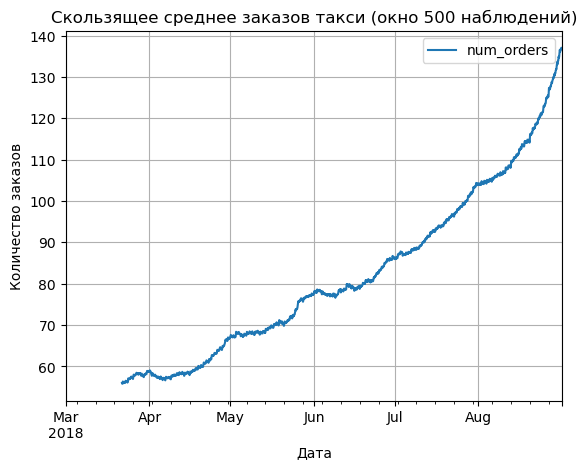

In [101]:
plt.figure(figsize=(15,10))
data.rolling(500).mean().plot(title='Скользящее среднее заказов такси (окно 500 наблюдений)', 
                              xlabel='Дата', 
                              ylabel='Количество заказов')
plt.grid(True);

Построим графики с трендом, сезонностью и остатками по всем дням 

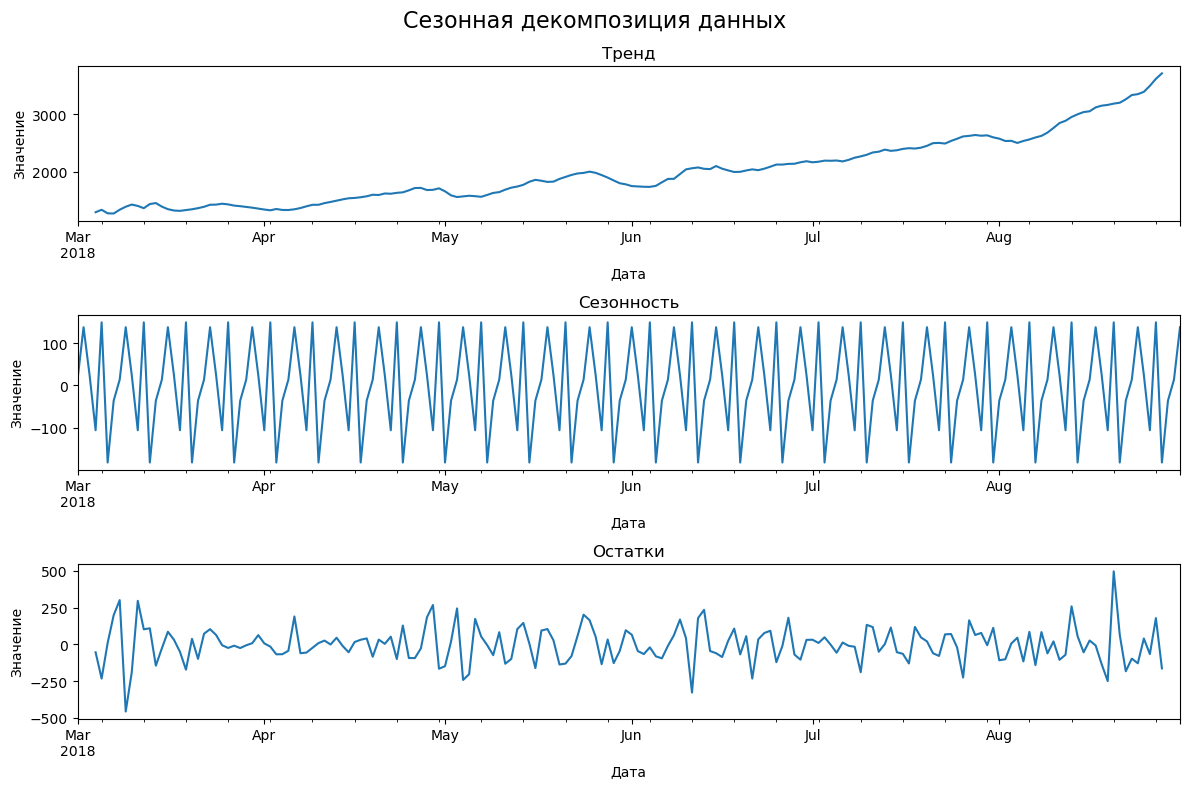

In [84]:
decomposed=seasonal_decompose(data.resample('1D').sum(), model='additive')
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

decomposed.trend.plot(ax=axes[0])
axes[0].set_title('Тренд')
axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Значение')

decomposed.seasonal.plot(ax=axes[1])
axes[1].set_title('Сезонность')
axes[1].set_xlabel('Дата')
axes[1].set_ylabel('Значение')

decomposed.resid.plot(ax=axes[2])
axes[2].set_title('Остатки')
axes[2].set_xlabel('Дата')
axes[2].set_ylabel('Значение')

fig.suptitle('Сезонная декомпозиция данных', fontsize=16)
plt.tight_layout();

Построим графики с трендом, сезонностью и остатками в диапазоне по часам

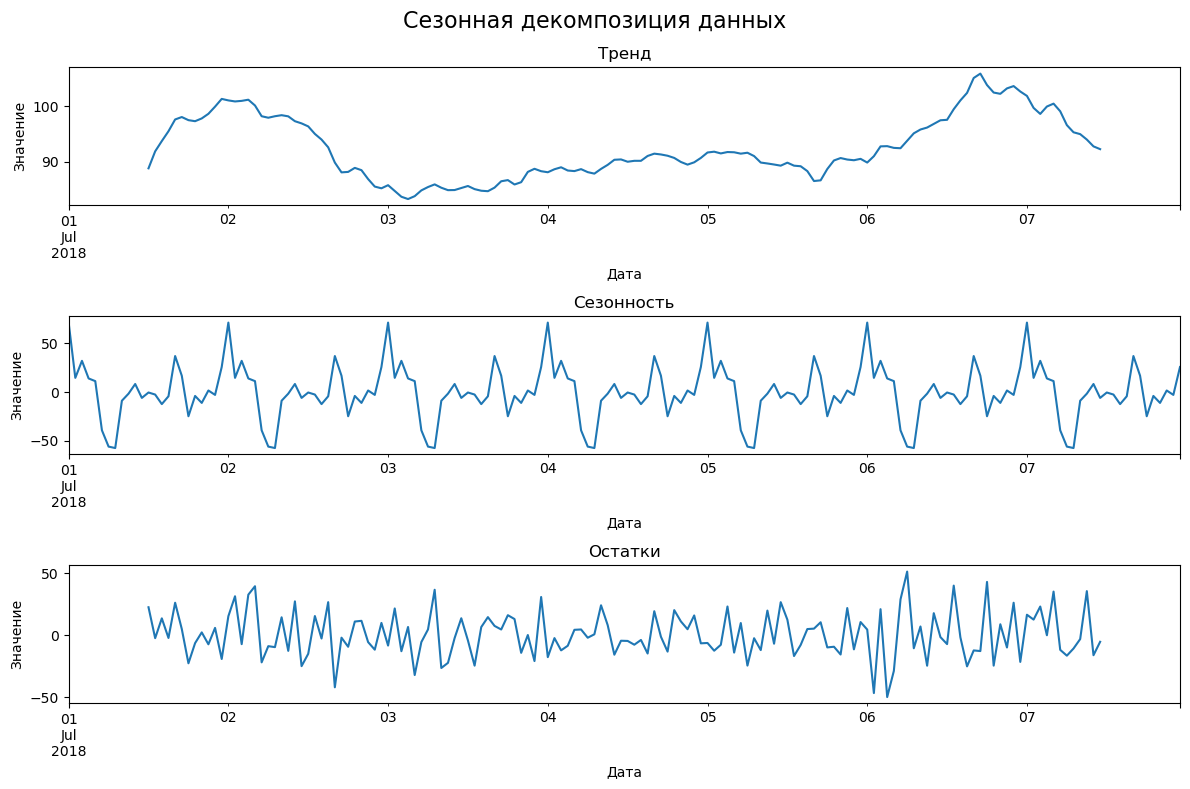

In [85]:
decomposed=seasonal_decompose(data['2018-07-01':'2018-07-07'].resample('1h').sum(), model='additive')
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

decomposed.trend.plot(ax=axes[0])
axes[0].set_title('Тренд')
axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Значение')

decomposed.seasonal.plot(ax=axes[1])
axes[1].set_title('Сезонность')
axes[1].set_xlabel('Дата')
axes[1].set_ylabel('Значение')

decomposed.resid.plot(ax=axes[2])
axes[2].set_title('Остатки')
axes[2].set_xlabel('Дата')
axes[2].set_ylabel('Значение')

fig.suptitle('Сезонная декомпозиция данных', fontsize=16)
plt.tight_layout();

Вывод разности временного ряда

In [87]:
print(data.shift(fill_value=0))

                     num_orders
datetime                       
2018-03-01 00:00:00           0
2018-03-01 01:00:00         124
2018-03-01 02:00:00          85
2018-03-01 03:00:00          71
2018-03-01 04:00:00          66
...                         ...
2018-08-31 19:00:00         207
2018-08-31 20:00:00         136
2018-08-31 21:00:00         154
2018-08-31 22:00:00         159
2018-08-31 23:00:00         223

[4416 rows x 1 columns]


График разности временного ряда

<Figure size 1500x1000 with 0 Axes>

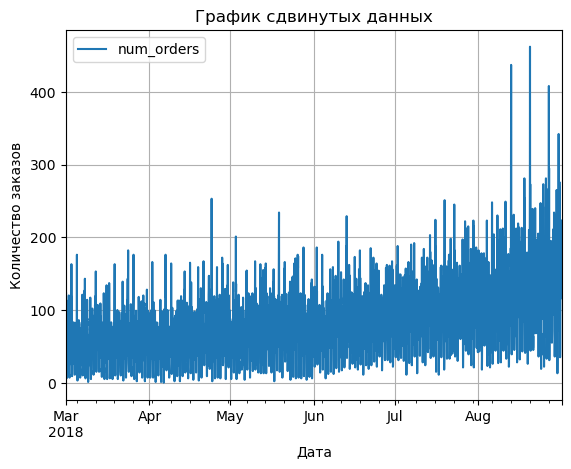

In [102]:
plt.figure(figsize=(15, 10))
data.shift(fill_value=0).plot(title='График сдвинутых данных', 
                              xlabel='Дата', 
                              ylabel='Количество заказов')
plt.grid(True);

Построим график скользящей среднего и стандартного отклонения

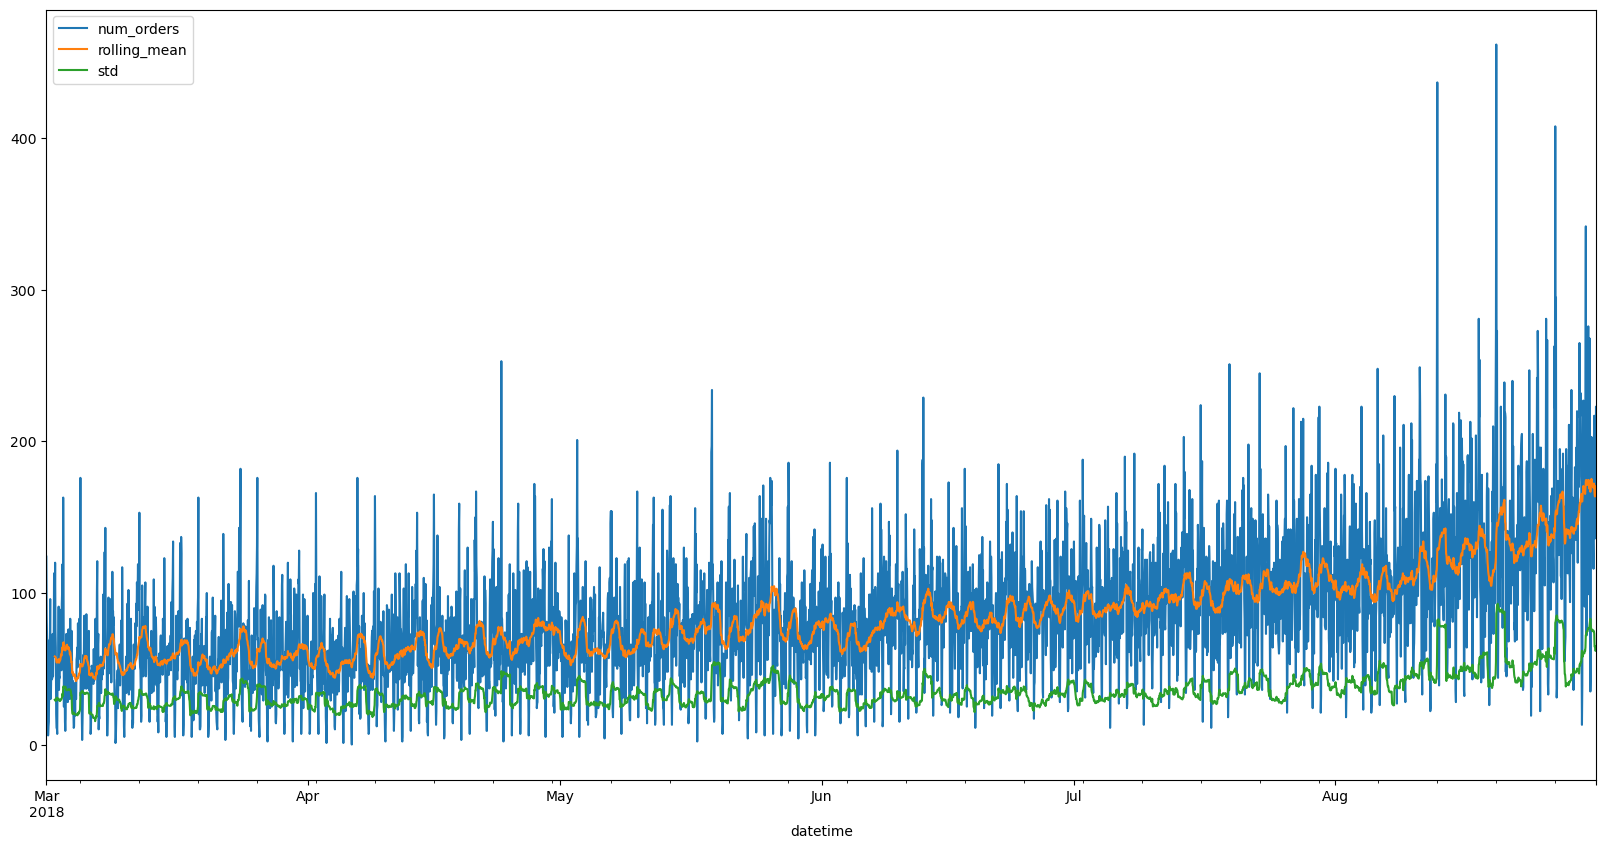

In [96]:
data_copy=data.copy()
data_copy['rolling_mean'] = data_copy.rolling(25).mean()
data_copy['std'] = data_copy['num_orders'].rolling(25).std()
data_copy.plot(figsize=(20, 10));

График с разницей между текущим и предыдущим значениями, добавим столбцы со скользящим средним и стандартным отклонением

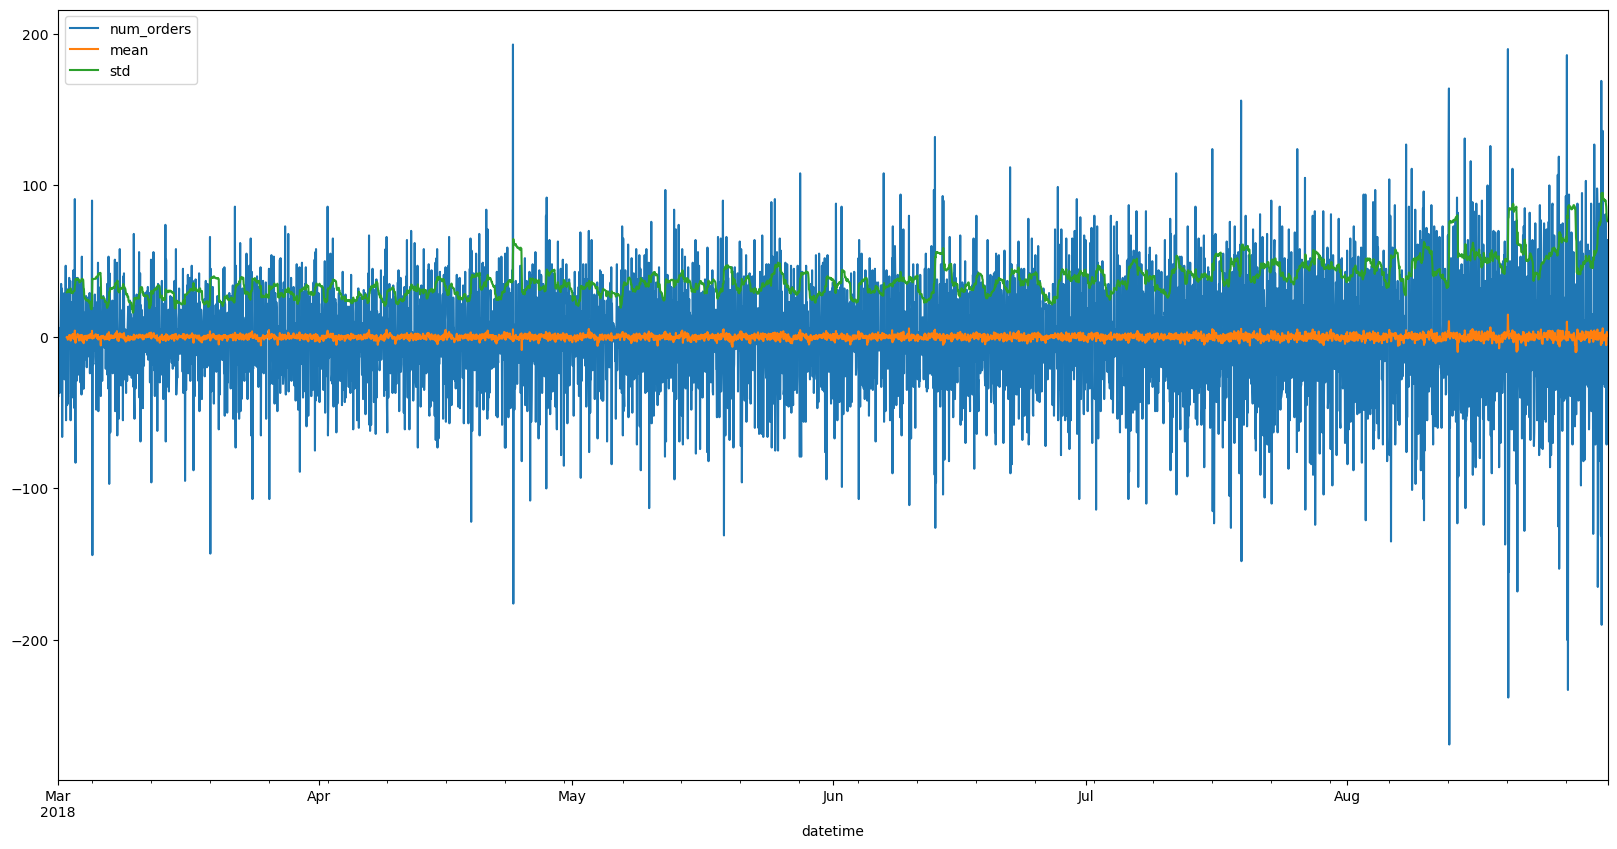

In [99]:
df_shift = data - data.shift()
df_shift['mean'] = df_shift['num_orders'].rolling(25).mean()
df_shift['std'] = df_shift['num_orders'].rolling(25).std()
df_shift.plot(figsize=(20, 10));

<b>Промежуточный вывод:</b>

На этом этапе был проведен анализ данных с использованием метода декомпозиции, который выявил следующие аспекты:

- Тренд: Наблюдается общий тренд на увеличение количества заказов такси в течение часа, что, вероятно, связано с ростом компании. Гипотеза о том, что бизнес, связанный с такси, не имеет месячной сезонности, требует подтверждения или опровержения на основе данных за несколько лет.

- Сезонность: На графиках четко видна суточная сезонность. Количество заказов ночью стремится к нулю, в то время как вечерний час пик характеризуется самым сильным спросом на услуги такси.

## Обучение

Обучим три модели в качестве моделей используем LinearRegression, CatBoostRegressor и LightGBM.

## Тестирование

## Общий вывод